<a href="https://colab.research.google.com/github/minnji88/DeepLearning2020/blob/master/3_5_%EB%89%B4%EC%8A%A4%EA%B8%B0%EC%82%AC%EB%B6%84%EB%A5%98_%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 로이터 데이터셋

In [1]:
from keras.datasets import reuters
# 가장 자주 등장하는 단어 10,000개로 제한
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


## 데이터 준비

*레이블을 벡터로 바꾸는 방법*

1. 레이블의 리스트를 정수 텐서로 변환
2. 원-핫 인코딩 사용

In [5]:
# 코드 3-14 데이터 인코딩하기
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data) # 훈련 데이터 벡터 변환
x_test = vectorize_sequences(test_data) # 테스트 데이터 벡터 변환

####  원-핫 인코딩

In [6]:
# 레이블 벡터 변환
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### 모델 구성
출력결과가 2개로 나누어지는 것이 아닌 46개라는 차이

16차원은 46개의 데이터를 구분하지 못할 수 있으니 이번에는 64개의 유닛을 이용합니다.



마지막 출력이 46입니다. 각 입력 샘플에 대해 46차원 벡터를 출력한다는 뜻입니다.
softmax 활성화 함수를 사용하였습니다. 이는 46개의 출력 클래스에 대한 확률 분포를 출력하며, 총합은 1입니다.
이런 분류에서 손실 함수는 categorical_crossentropy를 사용합니다. 이 함수는 두 확률 분포 사이의 거리를 측정하고, 확률 분포 사의 거리를 최소화하며 최적화 합니다.


In [7]:
# 코드 3-15 모델 정의하기
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [8]:
# 모델 컴파일하기
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 훈련 검증

In [9]:
# 검증세트 준비하기
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [10]:
# 코드 3-18 모델 훈련하기
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 3s 38ms/step - loss: 3.1047 - accuracy: 0.4161 - val_loss: 1.7580 - val_accuracy: 0.6300
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 1.5292 - accuracy: 0.6829 - val_loss: 1.3577 - val_accuracy: 0.6950
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.1314 - accuracy: 0.7532 - val_loss: 1.1592 - val_accuracy: 0.7450
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8882 - accuracy: 0.8109 - val_loss: 1.0624 - val_accuracy: 0.7660
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.7185 - accuracy: 0.8456 - val_loss: 0.9980 - val_accuracy: 0.7780
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5907 - accuracy: 0.8769 - val_loss: 0.9208 - val_accuracy: 0.8060
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4488 - accuracy: 0.9078 - val_loss: 0.9055 - val_accuracy: 0.8150
Epoch 8/20
16

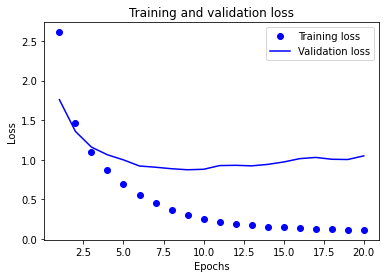

range(1, 21)


In [11]:
# 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
print(epochs)

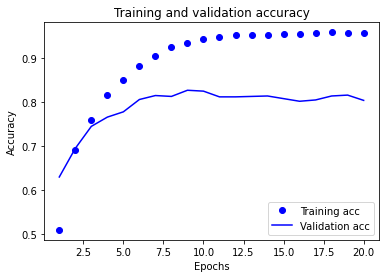

In [12]:
# 훈련과 검증 정확도
plt.clf() #그래프를 초기화합니다.

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [13]:
# 아홉번째 에포크 이후 과대적합 발생
# 코드 3-21 모델을 처음부터 다시 훈련하기
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)


Epoch 1/9
16/16 [==============================] - 1s 23ms/step - loss: 3.0240 - accuracy: 0.4473 - val_loss: 1.6442 - val_accuracy: 0.6470
Epoch 2/9
16/16 [==============================] - 0s 15ms/step - loss: 1.4530 - accuracy: 0.6855 - val_loss: 1.2756 - val_accuracy: 0.7230
Epoch 3/9
16/16 [==============================] - 0s 16ms/step - loss: 1.0739 - accuracy: 0.7658 - val_loss: 1.1199 - val_accuracy: 0.7500
Epoch 4/9
16/16 [==============================] - 0s 16ms/step - loss: 0.8307 - accuracy: 0.8186 - val_loss: 1.0403 - val_accuracy: 0.7750
Epoch 5/9
16/16 [==============================] - 0s 15ms/step - loss: 0.6454 - accuracy: 0.8633 - val_loss: 0.9635 - val_accuracy: 0.7930
Epoch 6/9
16/16 [==============================] - 0s 15ms/step - loss: 0.5137 - accuracy: 0.8909 - val_loss: 0.9193 - val_accuracy: 0.8060
Epoch 7/9
16/16 [==============================] - 0s 16ms/step - loss: 0.4271 - accuracy: 0.9111 - val_loss: 0.9044 - val_accuracy: 0.8110
Epoch 8/9
16/16 [===

In [14]:
results     # 78% 정확도 달성

[1.002608299255371, 0.7836152911186218]

### 새로운 데이터에 대해 예측하기

In [15]:
predictions = model.predict(x_test)

In [16]:
predictions[0].shape

(46,)

In [17]:
np.sum(predictions[0])

1.0000001

In [18]:
np.argmax(predictions[0])

3